In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import IPython as ip
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
mpl.style.use('ggplot')
mpl.rc('figure', figsize=(7.2, 5.76))
mpl.rc('font', family='Noto Sans CJK TC')
plt.rc('lines', markeredgecolor='white', markeredgewidth=0.75)
plt.rc('patch', edgecolor='white', force_edgecolor=True, linewidth=1)
ip.display.set_matplotlib_formats('svg')

In [3]:
df_fair = sm.datasets.fair.load_pandas().data

In [4]:
df = df_fair
(smf
 .ols('affairs ~ rate_marriage*religious', df)
 .fit()
 .summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     107.8
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           4.55e-68
Time:                        15:39:28   Log-Likelihood:                -13904.
No. Observations:                6366   AIC:                         2.782e+04
Df Residuals:                    6362   BIC:                         2.784e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.6495      0.347     13.395      0.000       3.969       5.330
rate_marriage              -0.7891      0.082     -9.622      0.000      -0.950      -0.628
religious                  -0.9846      0.138     -7.122      0.000      -1.256      -0.714
rate_marriage:religious     0.1681      0.032      5.209      0.000       0.105       0.231
==============================================================================
Omnibus:                     9399.882   Durbin-Watson:                   1.615
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5196635.028
Skew:                           8.843   Prob(JB):                         0.00
Kurtosis:                     141.848   Cond. No.                         170.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
df = df_fair
res = (smf
       .ols('affairs'
            '~ C(rate_marriage)*C(religious)', df)
       .fit())
display(res.summary(),
        # type III is suitable to unbalanced dataset
        # ref: http://bit.ly/3typess
        sm.stats.anova_lm(res, typ=3))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     19.95
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           1.46e-66
Time:                        15:39:28   Log-Likelihood:                -13877.
No. Observations:                6366   AIC:                         2.779e+04
Df Residuals:                    6346   BIC:                         2.793e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                       1.3341      0.505      2.640      0.008       0.344       2.325
C(rate_marriage)[T.2.0]                         1.9654      0.581      3.384      0.001       0.827       3.104
C(rate_marriage)[T.3.0]                         1.0479      0.530      1.977      0.048       0.009       2.087
C(rate_marriage)[T.4.0]                        -0.3282      0.518     -0.633      0.527      -1.344       0.688
C(rate_marriage)[T.5.0]                        -0.6430      0.516     -1.246      0.213      -1.654       0.368
C(religious)[T.2.0]                             0.1143      0.619      0.185      0.853      -1.099       1.327
C(religious)[T.3.0]                            -0.3413      0.613     -0.556      0.578      -1.544       0.861
C(religious)[T.4.0]                            -0.6082      0.955     -0.637      0.524      -2.480       1.264
C(rate_marriage)[T.2.0]:C(religious)[T.2.0]    -1.8103      0.705     -2.569      0.010      -3.192      -0.429
C(rate_marriage)[T.3.0]:C(religious)[T.2.0]    -1.1905      0.648     -1.837      0.066      -2.461       0.080
C(rate_marriage)[T.4.0]:C(religious)[T.2.0]    -0.3499      0.634     -0.552      0.581      -1.592       0.893
C(rate_marriage)[T.5.0]:C(religious)[T.2.0]    -0.4682      0.632     -0.741      0.459      -1.707       0.770
C(rate_marriage)[T.2.0]:C(religious)[T.3.0]    -1.8707      0.704     -2.656      0.008      -3.252      -0.490
C(rate_marriage)[T.3.0]:C(religious)[T.3.0]    -0.9741      0.644     -1.511      0.131      -2.238       0.289
C(rate_marriage)[T.4.0]:C(religious)[T.3.0]    -0.1333      0.628     -0.212      0.832      -1.365       1.098
C(rate_marriage)[T.5.0]:C(religious)[T.3.0]    -0.0448      0.626     -0.072      0.943      -1.271       1.182
C(rate_marriage)[T.2.0]:C(religious)[T.4.0]    -2.2192      1.085     -2.045      0.041      -4.346      -0.092
C(rate_marriage)[T.3.0]:C(religious)[T.4.0]    -1.1008      1.002     -1.099      0.272      -3.064       0.863
C(rate_marriage)[T.4.0]:C(religious)[T.4.0]    -0.0946      0.975     -0.097      0.923      -2.005       1.816
C(rate_marriage)[T.5.0]:C(religious)[T.4.0]     0.0196      0.967      0.020      0.984      -1.876       1.915
==============================================================================
Omnibus:                     9360.488   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5123160.759
Skew:                           8.770   Prob(JB):                         0.00
Kurtosis:                     140.865   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors as

,sum_sq,df,F,PR(>F)
Intercept,32.036981,1.0,6.972169,8.298982e-03
C(rate_marriage),616.181758,4.0,33.524719,1.018762e-27
C(religious),5.749640,3.0,0.417096,7.407375e-01
C(rate_marriage):C(religious),221.600130,12.0,4.018880,3.024540e-06
Residual,29159.748241,6346.0,NaN,NaN


In [6]:
df = df_fair
res = (smf
       .ols('affairs'
            '~ C(rate_marriage)'
            '+ C(rate_marriage):C(religious)', df)
       .fit())
display(res.summary(),
        sm.stats.anova_lm(res, typ=3))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     19.95
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           1.46e-66
Time:                        15:39:29   Log-Likelihood:                -13877.
No. Observations:                6366   AIC:                         2.779e+04
Df Residuals:                    6346   BIC:                         2.793e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     1.3341      0.505      2.640      0.008       0.344       2.325
C(rate_marriage)[T.2.0]                       1.9654      0.581      3.384      0.001       0.827       3.104
C(rate_marriage)[T.3.0]                       1.0479      0.530      1.977      0.048       0.009       2.087
C(rate_marriage)[T.4.0]                      -0.3282      0.518     -0.633      0.527      -1.344       0.688
C(rate_marriage)[T.5.0]                      -0.6430      0.516     -1.246      0.213      -1.654       0.368
C(rate_marriage)[1.0]:C(religious)[T.2.0]     0.1143      0.619      0.185      0.853      -1.099       1.327
C(rate_marriage)[2.0]:C(religious)[T.2.0]    -1.6960      0.337     -5.034      0.000      -2.356      -1.035
C(rate_marriage)[3.0]:C(religious)[T.2.0]    -1.0762      0.193     -5.574      0.000      -1.455      -0.698
C(rate_marriage)[4.0]:C(religious)[T.2.0]    -0.2356      0.137     -1.719      0.086      -0.504       0.033
C(rate_marriage)[5.0]:C(religious)[T.2.0]    -0.3539      0.128     -2.774      0.006      -0.604      -0.104
C(rate_marriage)[1.0]:C(religious)[T.3.0]    -0.3413      0.613     -0.556      0.578      -1.544       0.861
C(rate_marriage)[2.0]:C(religious)[T.3.0]    -2.2120      0.346     -6.385      0.000      -2.891      -1.533
C(rate_marriage)[3.0]:C(religious)[T.3.0]    -1.3154      0.198     -6.646      0.000      -1.703      -0.927
C(rate_marriage)[4.0]:C(religious)[T.3.0]    -0.4746      0.136     -3.487      0.000      -0.741      -0.208
C(rate_marriage)[5.0]:C(religious)[T.3.0]    -0.3861      0.124     -3.124      0.002      -0.628      -0.144
C(rate_marriage)[1.0]:C(religious)[T.4.0]    -0.6082      0.955     -0.637      0.524      -2.480       1.264
C(rate_marriage)[2.0]:C(religious)[T.4.0]    -2.8273      0.516     -5.483      0.000      -3.838      -1.817
C(rate_marriage)[3.0]:C(religious)[T.4.0]    -1.7089      0.302     -5.651      0.000      -2.302      -1.116
C(rate_marriage)[4.0]:C(religious)[T.4.0]    -0.7028      0.196     -3.593      0.000      -1.086      -0.319
C(rate_marriage)[5.0]:C(religious)[T.4.0]    -0.5886      0.153     -3.857      0.000      -0.888      -0.289
==============================================================================
Omnibus:                     9360.488   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5123160.759
Skew:                           8.770   Prob(JB):                         0.00
Kurtosis:                     140.865   Cond. No.                         66.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors 

,sum_sq,df,F,PR(>F)
Intercept,32.036981,1.0,6.972169,8.298982e-03
C(rate_marriage),616.181758,4.0,33.524719,1.018762e-27
C(rate_marriage):C(religious),643.734568,15.0,9.339677,4.129263e-22
Residual,29159.748241,6346.0,NaN,NaN


In [7]:
res = (smf
       .ols('affairs'
            '~ C(rate_marriage)'
            '+ C(rate_marriage):C(religious)', df)
       .fit())
df = pd.DataFrame(dict(params=res.params,
                       pvalues=res.pvalues))
df[df.pvalues < 0.05].sort_values('params')

,params,pvalues
C(rate_marriage)[2.0]:C(religious)[T.4.0],-2.827311,4.332135e-08
C(rate_marriage)[2.0]:C(religious)[T.3.0],-2.211959,1.839741e-10
C(rate_marriage)[3.0]:C(religious)[T.4.0],-1.708937,1.665461e-08
C(rate_marriage)[2.0]:C(religious)[T.2.0],-1.695969,4.948505e-07
C(rate_marriage)[3.0]:C(religious)[T.3.0],-1.315414,3.257529e-11
C(rate_marriage)[3.0]:C(religious)[T.2.0],-1.076195,2.587226e-08
C(rate_marriage)[4.0]:C(religious)[T.4.0],-0.702780,3.290651e-04
C(rate_marriage)[5.0]:C(religious)[T.4.0],-0.588575,1.157347e-04
C(rate_marriage)[4.0]:C(religious)[T.3.0],-0.474564,4.913968e-04
C(rate_marriage)[5.0]:C(religious)[T.3.0],-0.386073,1.792059e-03


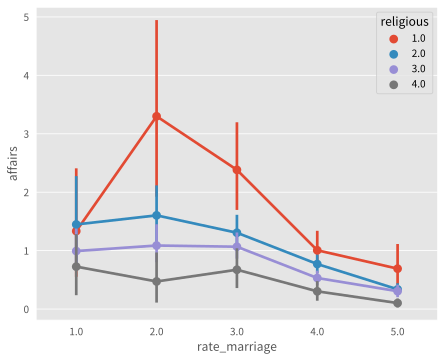

In [8]:
df = df_fair
sns.pointplot(data=df,
              x='rate_marriage',
              y='affairs',
              hue='religious')